**Importing Libraries**

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import sklearn
from google.colab import drive
from sklearn.preprocessing import StandardScaler

In [ ]:
from scipy import stats

In [ ]:
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Neural_Networks/ProjectC3/TrainingData')#Where the data is stored

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
window_size=30.  #setting window size for making data suitable for rnns

In [ ]:
os.listdir()

['subject_007_04__y_time.csv',
 'subject_001_01__y.csv',
 'subject_001_02__y.csv',
 'subject_001_07__y.csv',
 'subject_001_03__x_time.csv',
 'subject_001_08__y.csv',
 'subject_001_03__y.csv',
 'subject_001_05__y.csv',
 'subject_001_05__y_time.csv',
 'subject_001_03__y_time.csv',
 'subject_001_08__y_time.csv',
 'subject_001_07__y_time.csv',
 'subject_001_08__x_time.csv',
 'subject_001_02__y_time.csv',
 'subject_001_01__x.csv',
 'subject_001_04__y.csv',
 'subject_001_04__y_time.csv',
 'subject_001_04__x_time.csv',
 'subject_001_05__x_time.csv',
 'subject_001_01__x_time.csv',
 'subject_001_06__x_time.csv',
 'subject_001_06__y.csv',
 'subject_001_06__y_time.csv',
 'subject_001_07__x_time.csv',
 'subject_001_06__x.csv',
 'subject_001_01__y_time.csv',
 'subject_001_02__x_time.csv',
 'subject_001_05__x.csv',
 'subject_001_03__x.csv',
 'subject_001_04__x.csv',
 'subject_001_07__x.csv',
 'subject_001_08__x.csv',
 'subject_002_01__y.csv',
 'subject_002_01__y_time.csv',
 'subject_002_01__x_time.c

In [ ]:
subjects=[str(i) for i in range(1,9)]
sessions=[str(i) for i in range(1,9)]

Distributing the data

In [ ]:
train_files=[[1,1],[1,2],[1,3],[1,4],[1,5],[1,6],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3],[4,1],[4,2],[5,1],[5,2],[5,3],[6,1],[6,2],[6,3],[7,1],[7,2],[7,3],[8,1]]
val_files=[[1,7],[2,4],[7,4]]
test_files=[[1,8],[2,5]]

In [ ]:
# df_x=pd.read_csv('subject_001_01__x.csv',header=None,names=['acc.x','acc.y','acc.z','gyr.x','gyr.y','gyr.z'])
# df_x_time=pd.read_csv('subject_001_01__x_time.csv',header=None,names=['timestamp'])
# df_x=df_x.join(df_x_time)
# df_y=pd.read_csv('subject_001_01__y.csv',header=None,names=['y'])
# df_y_time=pd.read_csv('subject_001_01__y_time.csv',header=None,names=['timestamp'])
# df_y=df_y.join(df_y_time)

In [ ]:
# df_x.head(20)

In [ ]:
# df_y[df_y.y==1]

In [ ]:
fig, ax = plt.subplots()

# Plot the data
ax.plot(df_y['timestamp'][:10000],df_y['y'][:10000])

In [ ]:
# df_y['y_timestamp']=df_y['timestamp']

In [ ]:
# merged_df = pd.merge_asof(df_x, df_y, on='timestamp', direction='nearest', allow_exact_matches=False, tolerance=0.06,suffixes=('_x', '_y'))


In [ ]:
# merged_df.shape

In [ ]:
# x_feat=merged_df.iloc[:,:6]

In [ ]:
# value_counts=merged_df['y_timestamp'].value_counts()

In [ ]:
# value_counts

In [ ]:
# filtered_values = value_counts[value_counts > 4].index

In [ ]:
# len(filtered_values)

In [ ]:
# merged_df[merged_df.y==1]

In [ ]:
'''
This function is used to merge X and Y data for each subject and session and return a merged Data Frame


'''

def getMergedDf(XFile,XTimeStampFile,YFile,YTimeStampFile):
  print("Processing--",XFile,"--",YFile)
  df_x=pd.read_csv(XFile,header=None,names=['acc.x','acc.y','acc.z','gyr.x','gyr.y','gyr.z'])
  df_x_time=pd.read_csv(XTimeStampFile,header=None,names=['timestamp'])
  df_x=df_x.join(df_x_time)
  df_y=pd.read_csv(YFile,header=None,names=['y'])
  df_y_time=pd.read_csv(YTimeStampFile,header=None,names=['timestamp'])
  df_y=df_y.join(df_y_time)
  df_y['y_timestamp']=df_y['timestamp']
  merged_df = pd.merge_asof(df_x, df_y, on='timestamp', direction='nearest', allow_exact_matches=False, tolerance=0.06,suffixes=('_x', '_y'))
  value_counts=merged_df['y_timestamp'].value_counts()
  #filtered_values = value_counts[value_counts < 4].index
  #print(len(filtered_values))
  return merged_df

In [ ]:
'''
It takes the current X and Y arrays and the merged dataframe and appends the current dataframe 
to the X and Y arrays while making the data sutable for RNN input
'''
def getData(merged_df,X_arr,y_arr):
  x_feat=merged_df.iloc[:,:6]
  for i in range(len(merged_df)-window_size):
    x_values=x_feat.iloc[i:i+window_size,:].values
    y_labels=merged_df.iloc[i:i+window_size,-2].values
    # print(x_values)
    # print(y_labels)
    X_arr.append(x_values)
    y_arr.append(stats.mode(y_labels)[0][0])

In [ ]:
# x_output=[]
# y=[]
# for i in range(len(merged_df)-window_size):
#   x_values=x_feat.iloc[i:i+window_size,:].values
#   y_labels=merged_df.iloc[i:i+window_size,-2].values
#   print(x_values)
#   print(y_labels)
#   x_output.append(x_values)
#   y.append(stats.mode(y_labels)[0][0])

In [ ]:
# x_arr=np.array(x_output)
# y_arr=np.array(y)

In [ ]:
# y

In [ ]:
# x_arr.shape

In [ ]:
# y_arr

In [ ]:
'''
Loops through the files and returns X and Y arrays


'''
def getXY(files):
  print(files)
  X_arr=[]
  y_arr=[]
  print(len(X_arr))
  print(len(y_arr))
  for file in files:
    print(file)
    try:
      XFile='subject_00'+str(file[0])+'_0'+str(file[1])+'__x.csv'
      XTimestampFile='subject_00'+str(file[0])+'_0'+str(file[1])+'__x_time.csv'
      YFile='subject_00'+str(file[0])+'_0'+str(file[1])+'__y.csv'
      YTimestampFile='subject_00'+str(file[0])+'_0'+str(file[1])+'__y_time.csv'
      merged_df=getMergedDf(XFile=XFile,XTimeStampFile=XTimestampFile,YFile=YFile,YTimeStampFile=YTimestampFile)
      prev=len(X_arr)
      getData(merged_df,X_arr,y_arr)
      assert len(X_arr)-prev==len(merged_df)-window_size
      assert len(y_arr)-prev==len(merged_df)-window_size
    except Exception as e:
      print(e)
  return np.array(X_arr),np.array(y_arr)
      # print('File with subject:',subject,' session:',session,' not found')

In [ ]:
#Creating the datasets
X_train,y_train=getXY(train_files)
X_val,y_val=getXY(val_files)
X_test,y_test=getXY(test_files)

[[1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [2, 1], [2, 2], [2, 3], [3, 1], [3, 2], [3, 3], [4, 1], [4, 2], [5, 1], [5, 2], [5, 3], [6, 1], [6, 2], [6, 3], [7, 1], [7, 2], [7, 3], [8, 1]]
0
0
[1, 1]
Processing-- subject_001_01__x.csv -- subject_001_01__y.csv


<ipython-input-15-d61d2966bded>:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_arr.append(stats.mode(y_labels)[0][0])


[1, 2]
Processing-- subject_001_02__x.csv -- subject_001_02__y.csv


<ipython-input-15-d61d2966bded>:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_arr.append(stats.mode(y_labels)[0][0])


[1, 3]
Processing-- subject_001_03__x.csv -- subject_001_03__y.csv


<ipython-input-15-d61d2966bded>:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_arr.append(stats.mode(y_labels)[0][0])


[1, 4]
Processing-- subject_001_04__x.csv -- subject_001_04__y.csv


<ipython-input-15-d61d2966bded>:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_arr.append(stats.mode(y_labels)[0][0])


[1, 5]
Processing-- subject_001_05__x.csv -- subject_001_05__y.csv


<ipython-input-15-d61d2966bded>:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_arr.append(stats.mode(y_labels)[0][0])


[1, 6]
Processing-- subject_001_06__x.csv -- subject_001_06__y.csv


<ipython-input-15-d61d2966bded>:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_arr.append(stats.mode(y_labels)[0][0])


[2, 1]
Processing-- subject_002_01__x.csv -- subject_002_01__y.csv


<ipython-input-15-d61d2966bded>:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_arr.append(stats.mode(y_labels)[0][0])


[2, 2]
Processing-- subject_002_02__x.csv -- subject_002_02__y.csv


<ipython-input-15-d61d2966bded>:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_arr.append(stats.mode(y_labels)[0][0])


[2, 3]
Processing-- subject_002_03__x.csv -- subject_002_03__y.csv


<ipython-input-15-d61d2966bded>:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_arr.append(stats.mode(y_labels)[0][0])


[3, 1]
Processing-- subject_003_01__x.csv -- subject_003_01__y.csv


<ipython-input-15-d61d2966bded>:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_arr.append(stats.mode(y_labels)[0][0])


[3, 2]
Processing-- subject_003_02__x.csv -- subject_003_02__y.csv


<ipython-input-15-d61d2966bded>:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_arr.append(stats.mode(y_labels)[0][0])


[3, 3]
Processing-- subject_003_03__x.csv -- subject_003_03__y.csv


<ipython-input-15-d61d2966bded>:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_arr.append(stats.mode(y_labels)[0][0])


[4, 1]
Processing-- subject_004_01__x.csv -- subject_004_01__y.csv


<ipython-input-15-d61d2966bded>:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_arr.append(stats.mode(y_labels)[0][0])


[4, 2]
Processing-- subject_004_02__x.csv -- subject_004_02__y.csv


<ipython-input-15-d61d2966bded>:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_arr.append(stats.mode(y_labels)[0][0])


[5, 1]
Processing-- subject_005_01__x.csv -- subject_005_01__y.csv


<ipython-input-15-d61d2966bded>:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_arr.append(stats.mode(y_labels)[0][0])


[5, 2]
Processing-- subject_005_02__x.csv -- subject_005_02__y.csv


<ipython-input-15-d61d2966bded>:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_arr.append(stats.mode(y_labels)[0][0])


[5, 3]
Processing-- subject_005_03__x.csv -- subject_005_03__y.csv


<ipython-input-15-d61d2966bded>:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_arr.append(stats.mode(y_labels)[0][0])


[6, 1]
Processing-- subject_006_01__x.csv -- subject_006_01__y.csv


<ipython-input-15-d61d2966bded>:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_arr.append(stats.mode(y_labels)[0][0])


[6, 2]
Processing-- subject_006_02__x.csv -- subject_006_02__y.csv


<ipython-input-15-d61d2966bded>:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_arr.append(stats.mode(y_labels)[0][0])


[6, 3]
Processing-- subject_006_03__x.csv -- subject_006_03__y.csv


<ipython-input-15-d61d2966bded>:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_arr.append(stats.mode(y_labels)[0][0])


[7, 1]
Processing-- subject_007_01__x.csv -- subject_007_01__y.csv


<ipython-input-15-d61d2966bded>:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_arr.append(stats.mode(y_labels)[0][0])


[7, 2]
Processing-- subject_007_02__x.csv -- subject_007_02__y.csv


<ipython-input-15-d61d2966bded>:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_arr.append(stats.mode(y_labels)[0][0])


[7, 3]
Processing-- subject_007_03__x.csv -- subject_007_03__y.csv


<ipython-input-15-d61d2966bded>:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_arr.append(stats.mode(y_labels)[0][0])


[8, 1]
Processing-- subject_008_01__x.csv -- subject_008_01__y.csv


<ipython-input-15-d61d2966bded>:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_arr.append(stats.mode(y_labels)[0][0])


[[1, 7], [2, 4], [7, 4]]
0
0
[1, 7]
Processing-- subject_001_07__x.csv -- subject_001_07__y.csv


<ipython-input-15-d61d2966bded>:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_arr.append(stats.mode(y_labels)[0][0])


[2, 4]
Processing-- subject_002_04__x.csv -- subject_002_04__y.csv


<ipython-input-15-d61d2966bded>:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_arr.append(stats.mode(y_labels)[0][0])


[7, 4]
Processing-- subject_007_04__x.csv -- subject_007_04__y.csv


<ipython-input-15-d61d2966bded>:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_arr.append(stats.mode(y_labels)[0][0])


[[1, 8], [2, 5]]
0
0
[1, 8]
Processing-- subject_001_08__x.csv -- subject_001_08__y.csv


<ipython-input-15-d61d2966bded>:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_arr.append(stats.mode(y_labels)[0][0])


[2, 5]
Processing-- subject_002_05__x.csv -- subject_002_05__y.csv


<ipython-input-15-d61d2966bded>:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_arr.append(stats.mode(y_labels)[0][0])


In [ ]:
print("X-train Shape",X_train.shape," Y-train Shape",y_train.shape)
print("X-val Shape",X_val.shape," Y-val Shape",y_val.shape)
print("X-test Shape",X_test.shape," Y-test Shape",y_test.shape)

X-train Shape (1109522, 30, 6)  Y-train Shape (1109522,)
X-val Shape (122233, 30, 6)  Y-val Shape (122233,)
X-test Shape (109021, 30, 6)  Y-test Shape (109021,)


In [ ]:
#Saving the dataframes
np.save('X_train.npy', X_train)
np.save('y_train.npy', y_train)
np.save('X_val.npy', X_val)
np.save('y_val.npy', y_val)
np.save('X_test.npy', X_test)
np.save('y_test.npy', y_test)


In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
X_train=np.load("X_train.npy")
y_train=np.load("y_train.npy")
X_val=np.load("X_val.npy")
y_val=np.load("y_val.npy")
X_test=np.load("X_test.npy")
y_test=np.load("y_test.npy")

In [ ]:
print("X-train Shape",X_train.shape," Y-train Shape",y_train.shape)
print("X-val Shape",X_val.shape," Y-val Shape",y_val.shape)
print("X-test Shape",X_test.shape," Y-test Shape",y_test.shape)

X-train Shape (1109522, 30, 6)  Y-train Shape (1109522,)
X-val Shape (122233, 30, 6)  Y-val Shape (122233,)
X-test Shape (109021, 30, 6)  Y-test Shape (109021,)


In [ ]:
y_train

array([0., 0., 0., ..., 0., 0., 0.])

[0 1 2 3]
[62711, 3889, 4216, 38205]


<BarContainer object of 4 artists>

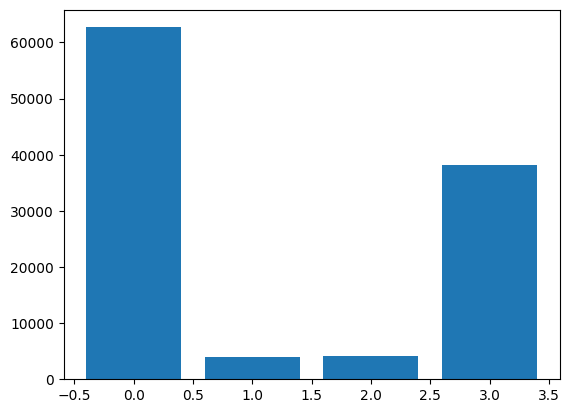

In [ ]:
'''
Visualizing the data distribution
'''
unique_values = np.unique(y_test)

# Count the frequency of each value in the array
print(unique_values)
value_counts = [np.count_nonzero(y_test == value) for value in unique_values]
print(value_counts)
plt.bar(unique_values,value_counts)

In [ ]:
#setting class weights:
unique_values = np.unique(y_train)

# Count the frequency of each value in the array
print(unique_values)
value_counts = [np.count_nonzero(y_train == value) for value in unique_values]
class_weights={}
for i in range(len(unique_values)):
  weight=len(y_train)/(4*value_counts[i])
  class_weights[unique_values[i]]=weight

[0. 1. 2. 3.]


In [ ]:
class_weights

{0.0: 0.32716523359635774,
 1.0: 5.725914992878228,
 2.0: 4.384838521000964,
 3.0: 1.849326621774785}

In [ ]:
print(sum(value_counts),len(y_train))

1109522 1109522


In [ ]:
y_train = tf.keras.utils.to_categorical(y_train)
y_val = tf.keras.utils.to_categorical(y_val)
# y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
sc=StandardScaler()
X_2d = X_train.reshape((-1, 6))
print(X_2d.shape)
sc.fit(X_2d)

(33285660, 6)


StandardScaler()

In [ ]:
X_train_scaled=sc.transform(X_train.reshape((-1,6)))
X_train_3d=X_train_scaled.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2])

In [ ]:
X_val_scaled=sc.transform(X_val.reshape((-1,6)))
X_val_3d=X_val_scaled.reshape(X_val.shape[0],X_val.shape[1],X_val.shape[2])

In [ ]:
X_test_scaled=sc.transform(X_test.reshape((-1,6)))
X_test_3d=X_test_scaled.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2])

In [ ]:
print("X-train Shape",X_train_3d.shape," Y-train Shape",y_train.shape)
print("X-val Shape",X_val_3d.shape," Y-val Shape",y_val.shape)
print("X-test Shape",X_test_3d.shape," Y-test Shape",y_test.shape)

X-train Shape (1109522, 30, 6)  Y-train Shape (1109522, 4)
X-val Shape (122233, 30, 6)  Y-val Shape (122233, 4)
X-test Shape (109021, 30, 6)  Y-test Shape (109021,)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Bidirectional, LSTM, Dropout

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
input_shape=(window_size,6)

In [ ]:
def get_model(input_shape,dropout):
  model=Sequential()
  model.add(Bidirectional(LSTM(128,input_shape=input_shape,return_sequences=True)))
  model.add(Dropout(dropout))
  model.add(Bidirectional(LSTM(64)))
  model.add(Dropout(dropout))
  model.add(Dense(32))
  model.add(Dense(16))
  model.add(Dense(4,activation='softmax'))
  return model

In [ ]:
models=[]
dropouts=[0.5,0.8]
lrs=[0.01,0.1,0.001]

In [ ]:
from sklearn.metrics import f1_score,classification_report,confusion_matrix

In [ ]:
#Tuning hyperparameters
for dropout in dropouts:
  for lr in lrs:
    model=get_model(input_shape,dropout)
    optimizer = tf.keras.optimizers.Adam(lr=lr)
    model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
    # model.summary()
    history=model.fit(X_train_3d,y_train,validation_data=(X_val_3d,y_val),epochs=10,shuffle=True,class_weight=class_weights,batch_size=128,verbose=1)
    y_predict=model.predict(X_test_3d)
    test_f1=f1_score(y_test,np.argmax(y_predict,axis=1),average='macro')
    models.append({'model':model,'history':history,'test_f1':test_f1,'dropout':dropout,'lr':lr})

In [ ]:
model=get_model(input_shape,0.5)

In [ ]:
optimizer = tf.keras.optimizers.Adam(lr=0.01)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 128)           69120     
                                                                 
 dropout (Dropout)           (None, 30, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 4)                 6

In [ ]:
history=model.fit(X_train_3d,y_train,validation_data=(X_val_3d,y_val),epochs=10,shuffle=True,class_weight=class_weights,batch_size=128,verbose=1)

Epoch 1/10
8669/8669 [==============================] - 99s 10ms/step - loss: 0.2375 - accuracy: 0.8672 - precision: 0.8785 - recall: 0.8533 - val_loss: 0.3166 - val_accuracy: 0.8893 - val_precision: 0.8911 - val_recall: 0.8870
Epoch 2/10
8669/8669 [==============================] - 85s 10ms/step - loss: 0.1191 - accuracy: 0.9292 - precision: 0.9322 - recall: 0.9254 - val_loss: 0.2818 - val_accuracy: 0.9135 - val_precision: 0.9145 - val_recall: 0.9125
Epoch 3/10
8669/8669 [==============================] - 86s 10ms/step - loss: 0.0834 - accuracy: 0.9476 - precision: 0.9490 - recall: 0.9458 - val_loss: 0.2463 - val_accuracy: 0.9278 - val_precision: 0.9287 - val_recall: 0.9268
Epoch 4/10
8669/8669 [==============================] - 82s 9ms/step - loss: 0.0641 - accuracy: 0.9585 - precision: 0.9595 - recall: 0.9575 - val_loss: 0.2760 - val_accuracy: 0.9269 - val_precision: 0.9275 - val_recall: 0.9263
Epoch 5/10
8669/8669 [==============================] - 81s 9ms/step - loss: 0.0518 - acc

In [ ]:
model.save('/content/drive/My Drive/Neural Networks/Project C3/final_models')

In [ ]:
from sklearn.metrics import f1_score,classification_report,confusion_matrix

In [ ]:
y_predict=model.predict(X_test_3d)

3407/3407 [==============================] - 16s 4ms/step


In [ ]:
np.argmax(y_predict,axis=1)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
f1_score(np.load("y_test.npy"),np.argmax(y_predict,axis=1),average='macro')

0.7284736503465933

In [ ]:
print(classification_report(np.load("y_test.npy"),np.argmax(y_predict,axis=1)))

              precision    recall  f1-score   support

           0       0.68      0.94      0.79     62711
           1       0.78      0.73      0.75      3889
           2       0.92      0.96      0.94      4216
           3       0.77      0.30      0.43     38205

    accuracy                           0.71    109021
   macro avg       0.79      0.73      0.73    109021
weighted avg       0.73      0.71      0.67    109021



In [ ]:
loaded_model = tf.keras.models.load_model('/content/drive/My Drive/Neural_Networks/ProjectC3/final_models')

In [ ]:
loaded_model.summary()

In [ ]:
os.chdir('/content/drive/My Drive/Neural_Networks/ProjectC3/TestData')

In [ ]:
prediction_files=[['09',1],['10',1],['11',1],['12',1]]

In [ ]:
'''
Creates the Prediction Data

'''
def makePredictionData(XFile,XTimeStampFile,YTimeStampFile):
  df_x=pd.read_csv(XFile,header=None,names=['acc.x','acc.y','acc.z','gyr.x','gyr.y','gyr.z'])
  df_x_time=pd.read_csv(XTimeStampFile,header=None,names=['timestamp'])
  df_x=df_x.join(df_x_time)
  df_y_time=pd.read_csv(YTimeStampFile,header=None,names=['timestamp'])
  addl_rows=df_y_time.shape[0] * 4 - df_x.shape[0] + window_size
  addl_df=df_x.iloc[-addl_rows:,]
  df_x=df_x.append(addl_df)
  x_feat=df_x.iloc[:,:6]
  X_arr=[]
  for i in range(len(df_x)-window_size):
    x_values=x_feat.iloc[i:i+window_size,:].values
    # y_labels=merged_df.iloc[i:i+window_size,-2].values
    # print(x_values)
    # print(y_labels)
    X_arr.append(x_values)
    # y_arr.append(stats.mode(y_labels)[0][0])

  #filtered_values = value_counts[value_counts < 4].index
  #print(len(filtered_values))
  return np.array(X_arr)

In [ ]:
'''
Creates the prediciton file

'''
def createPredictionFile(file):
  XFile='subject_0'+str(file[0])+'_0'+str(file[1])+'__x.csv'
  XTimestampFile='subject_0'+str(file[0])+'_0'+str(file[1])+'__x_time.csv'
  # YFile='subject_00'+str(file[0])+'_0'+str(file[1])+'__y.csv'
  YTimestampFile='subject_0'+str(file[0])+'_0'+str(file[1])+'__y_time.csv'
  print("Processing--Subject ",file[0]," Session ",file[1])
  X_arr=makePredictionData(XFile=XFile,XTimeStampFile=XTimestampFile,YTimeStampFile=YTimestampFile)
  print(X_arr.shape)
  X_arr_scaled=sc.transform(X_arr.reshape((-1,6)))
  X_arr_3d=X_arr_scaled.reshape(X_arr.shape[0],X_arr.shape[1],X_arr.shape[2])
  y_predict=loaded_model.predict(X_arr_3d)
  Y=np.argmax(y_predict,axis=1)
  # prev=len(X_arr)
  Y_Predictions=[]
  for i in range(0,Y.shape[0],4):
    Y_Predictions.append(stats.mode(Y[i:i+4])[0][0])
  # assert len(Y_Predictions)==len(YTimestampFile)
  predict_dataframe = pd.DataFrame(Y_Predictions, columns=['Y'])
  predict_dataframe.to_csv('/content/drive/My Drive/Neural_Networks/ProjectC3/TestData/Predictions/'+'subject_0'+str(file[0])+'_0'+str(file[1])+'__predictions.csv', index=False)
  
  

In [ ]:
for file in prediction_files:
  createPredictionFile(file)

In [ ]:
df=pd.read_csv('/content/drive/My Drive/Neural_Networks/ProjectC3/TestData/Predictions/'+'subject_011'+'_01__predictions'+'.csv')
df['Y'].value_counts()